# Islamic Finance Model vs Traditional Finance Model (Prototype 1)

Model on the bank **I**'s and **T**'s earning and the client **C**'s earning after initial capital **C<sub>0</sub>** invested by **I** and **T** in **C** over time **t** with profit percentage **p** and interest **i** given to **I** and **T** respectively by **C** 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Functions for the Islamic model

In [2]:
# function for C's business growth
def C(c0, alpha, t):
    return c0 * np.exp(alpha * t)

# function for rate of growth of profit of C (without repayment)
def C_profit(c0, alpha, t):
    return c0 * alpha * np.exp(alpha * t)

# function for bank I's profit
def I0(c0, alpha, p, t):
    return p * c0 * alpha * np.exp(alpha * t)

# function for growth of bank I's profit
def dI0(c0, alpha, p, t):
    return p * c0 * alpha * alpha * np.exp(alpha * t)

# function for C's net profit over time for system I
def C_net_profit_I0(c0, alpha, p, t):
    return (1-p) * c0 * alpha * np.exp(alpha * t)

# function for decayed profit rate (hypothetical case)
def p_func(p, beta, t):
    return p * np.exp(-beta * t)

# function for bank I's profit (hypothetical case)
def I1(c0, alpha, beta, p, t):
    return p * c0 * alpha * np.exp((alpha - beta) * t)

# function for growth of bank I's profit (hypothetical case)
def dI1(c0, alpha, beta, p, t):
    return (alpha - beta) * p * c0 * alpha * np.exp((alpha - beta) * t)

# function for C's net profit over time (hypothetical case)
def C_net_profit_I1(c0, alpha, beta, p, t):
    return (1 - (p * np.exp(-beta * t))) * c0 * alpha * np.exp(alpha * t)

### Functions for the Traditional model

In [3]:
# function for bank T's profit
def T(c0, i, t):
    return c0 * np.float_power((1 + i), t) - c0

# function for growth of bank T's profit
def dT(c0, i, t):
    return np.log(1 + i) * c0 * np.float_power((1 + i), t)

# function for C's net profit over time for system T
def C_net_profit_T(c0, alpha, i, t):
    return (c0 * alpha * np.exp(alpha * t)) - (c0 * np.float_power((1 + i), t)) + c0

### Parameters

In [4]:
c0 = 100000
p = 0.1
i = 0.1
alpha = 0.05
beta = 0.1

days = 365
years = 10
t = np.arange(0, years, 1)

## Analysis

### Growth of business **C**

Text(0.5, 1.0, 'Growth of business C')

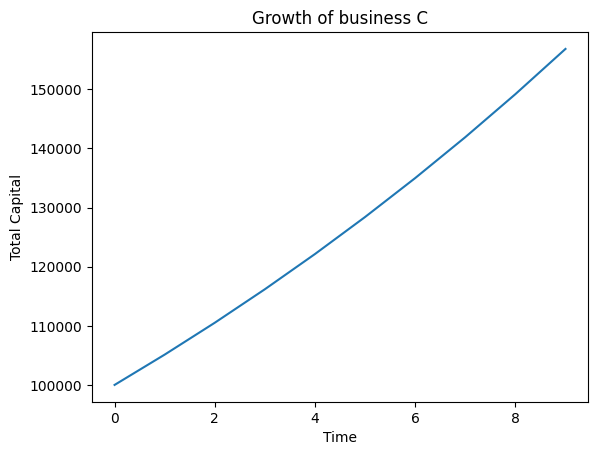

In [5]:
plt.plot(t, C(c0, alpha, t))
plt.xlabel("Time")
plt.ylabel("Total Capital")
plt.title("Growth of business C")

### Growth of profit for business **C**

Text(0.5, 1.0, 'Growth of profit for C')

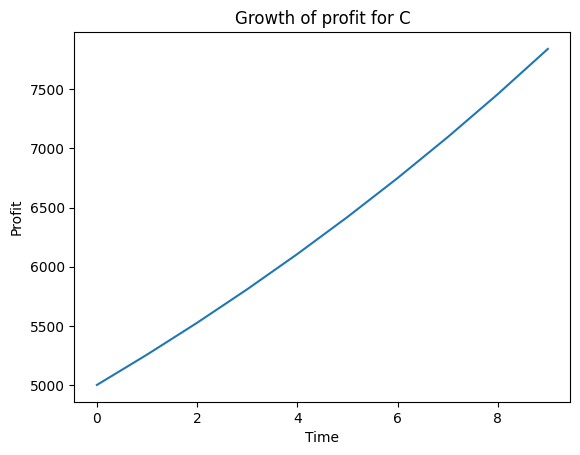

In [6]:
plt.plot(t, C_profit(c0, alpha, t))
plt.xlabel("Time")
plt.ylabel("Profit")
plt.title("Growth of profit for C")

### **I**'s profit over the years

Text(0.5, 1.0, 'Profit for I')

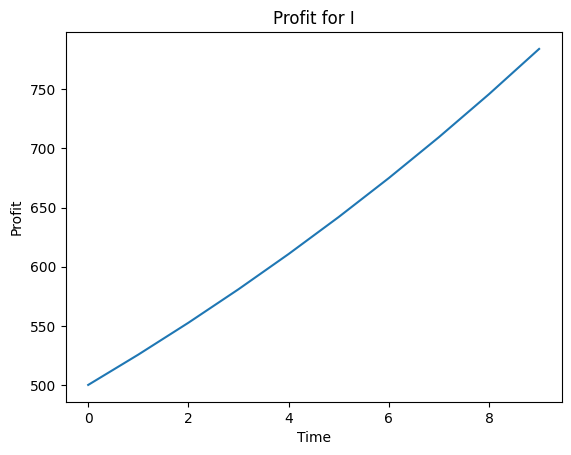

In [7]:
plt.plot(t, I0(c0, alpha, p, t))
plt.xlabel("Time")
plt.ylabel("Profit")
plt.title("Profit for I")

### **I**'s rate of profit growth over the years

Text(0.5, 1.0, 'Rate of growth of profit for I')

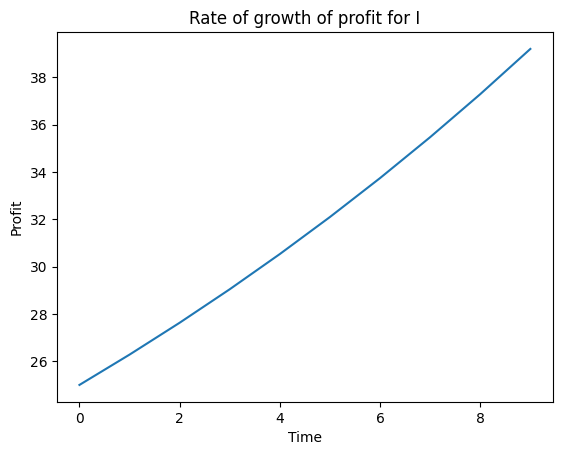

In [8]:
plt.plot(t, dI0(c0, alpha, p, t))
plt.xlabel("Time")
plt.ylabel("Profit")
plt.title("Rate of growth of profit for I")

### **C**'s net profit over the years using **I**'s system

Text(0.5, 1.0, 'Net profit for C')

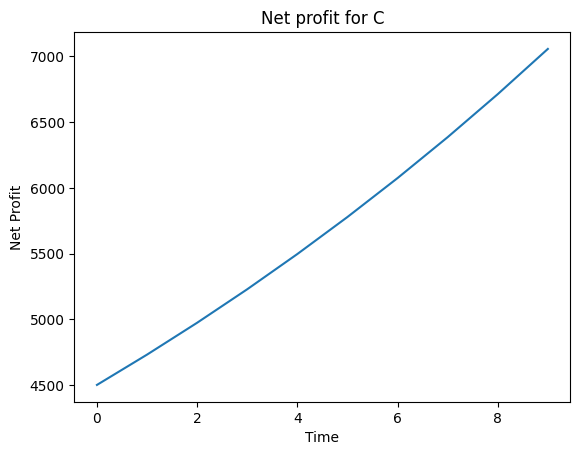

In [9]:
plt.plot(t, C_net_profit_I0(c0, alpha, p, t))
plt.xlabel("Time")
plt.ylabel("Net Profit")
plt.title("Net profit for C")

### **T**'s profit over the years

Text(0.5, 1.0, 'Profit for T')

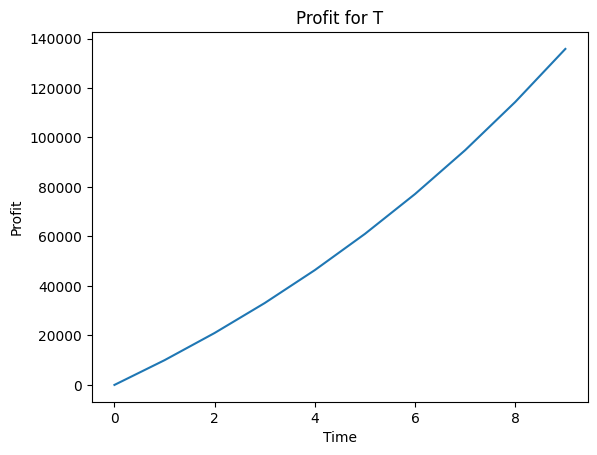

In [10]:
plt.plot(t, T(c0, i, t))
plt.xlabel("Time")
plt.ylabel("Profit")
plt.title("Profit for T")

### **T**'s rate of profit growth over the years

Text(0.5, 1.0, 'Rate of growth of profit for T')

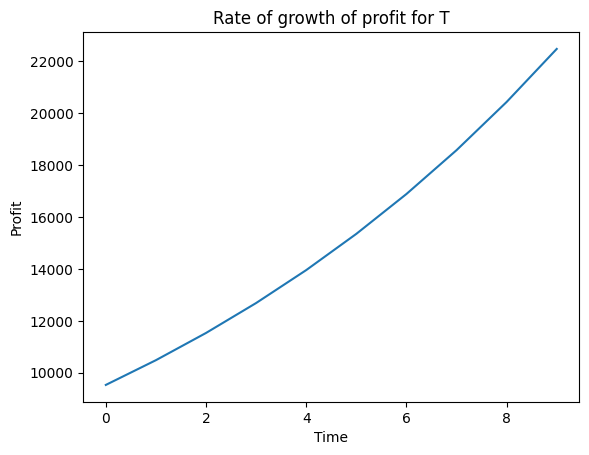

In [11]:
plt.plot(t, dT(c0, i, t))
plt.xlabel("Time")
plt.ylabel("Profit")
plt.title("Rate of growth of profit for T")

### **C**'s net profit over the years using **T**'s system

Text(0.5, 1.0, 'Net Profit for C')

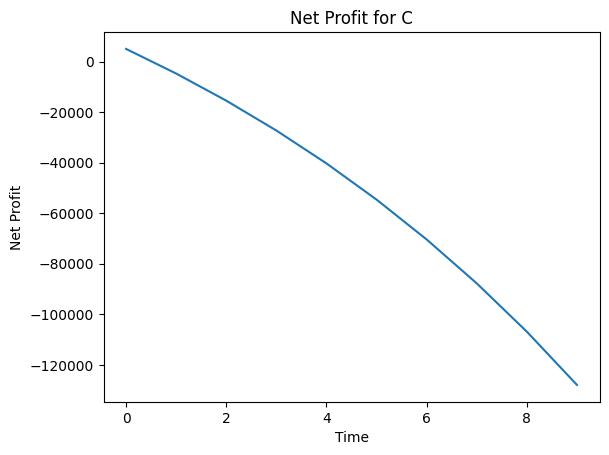

In [12]:
plt.plot(t, C_net_profit_T(c0, alpha, i, t))
plt.xlabel("Time")
plt.ylabel("Net Profit")
plt.title("Net Profit for C")

## Discussion
In this worst case scenario, where C's growth is okay (almost linear), I and C still manage to make profits although the rate is slow. However, T makes more profit than I. This may be good for T but C loses out as its business model cannot cope with the interest rates over the years. Hence C makes losses from the very beginning and the business shuts down.

## Summary of Graphs

### Profit of I vs T

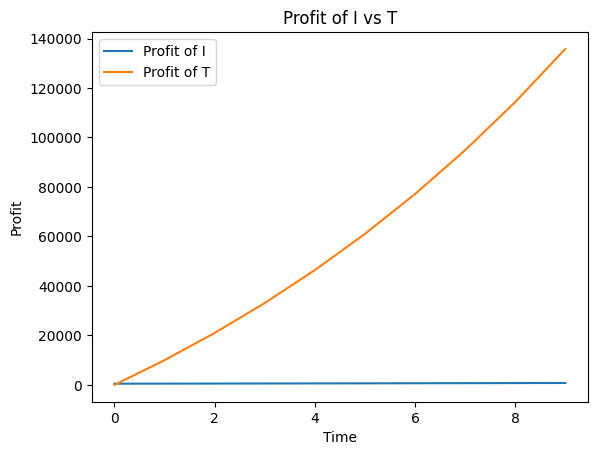

In [13]:
plt.plot(t, I0(c0, alpha, p, t), label="Profit of I")
plt.plot(t, T(c0, i, t), label="Profit of T")
plt.xlabel("Time")
plt.ylabel("Profit")
plt.title("Profit of I vs T")
plt.legend()

### Profit of I vs net profit of C

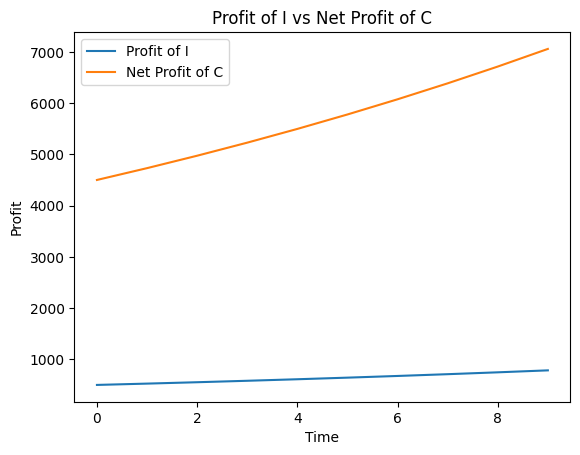

In [14]:
plt.plot(t, I0(c0, alpha, p, t), label="Profit of I")
plt.plot(t, C_net_profit_I0(c0, alpha, p, t), label="Net Profit of C")
plt.xlabel("Time")
plt.ylabel("Profit")
plt.title("Profit of I vs Net Profit of C")
plt.legend()

### Profit of T vs net profit of C

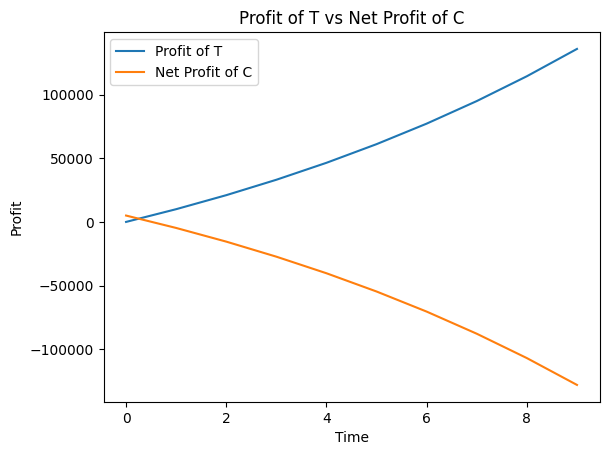

In [17]:
plt.plot(t, T(c0, i, t), label="Profit of T")
plt.plot(t, C_net_profit_T(c0, alpha, i, t), label="Net Profit of C")
plt.xlabel("Time")
plt.ylabel("Profit")
plt.title("Profit of T vs Net Profit of C")
plt.legend()